Shape of image data (64x64 images): (400, 64, 64)
Shape of flattened data (vectors): (400, 4096)
Pixel value range: 0.0 to 1.0


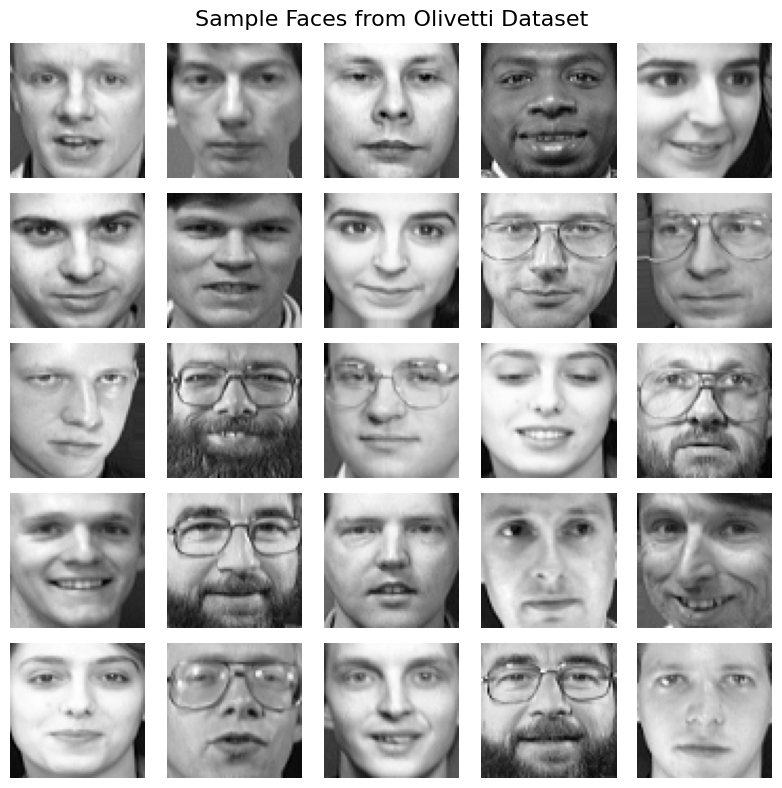

In [16]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces

# Load the dataset (shuffled for randomness)
faces = fetch_olivetti_faces(shuffle=True, random_state=42)

# Describing the shape of the data
print("Shape of image data (64x64 images):", faces.images.shape)  # (400, 64, 64)
print("Shape of flattened data (vectors):", faces.data.shape)     # (400, 4096)

# Checking the pixel value range
print("Pixel value range:", np.min(faces.images), "to", np.max(faces.images))  # Expect values between 0.0 and 1.0

# Visualize-ing a few sample faces (let's show 25)
fig, axes = plt.subplots(5, 5, figsize=(8, 8))  # Create 5x5 grid of subplots

for i, ax in enumerate(axes.flat):  # flat flattens the 2D array of axes to avoid using nested for loop
    ax.imshow(faces.images[i], cmap='gray')  # Show image in grayscale
    ax.axis('off')  # Hide x and y axis ticks(borders)

plt.suptitle("Sample Faces from Olivetti Dataset", fontsize=16)
plt.tight_layout()
plt.show()


Shape of flattened data matrix X: (400, 4096)


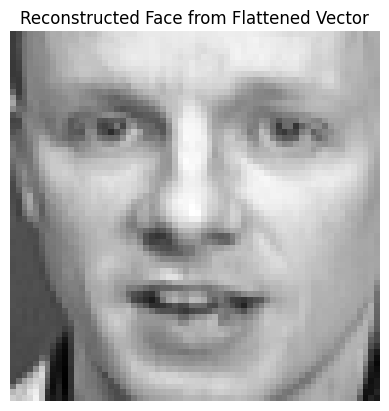

In [30]:
flattened_faces = []

for img in faces.images:
  vec = img.flatten()
  flattened_faces.append(vec)


X = np.array(flattened_faces)


print("Shape of flattened data matrix X:", X.shape)

# Reconstructing and plotting one of images to verify
img_zero_reconstructed = X[0].reshape(64, 64)
plt.imshow(img_zero_reconstructed, cmap='gray')
plt.title("Reconstructed Face from Flattened Vector")
plt.axis('off')
plt.show()

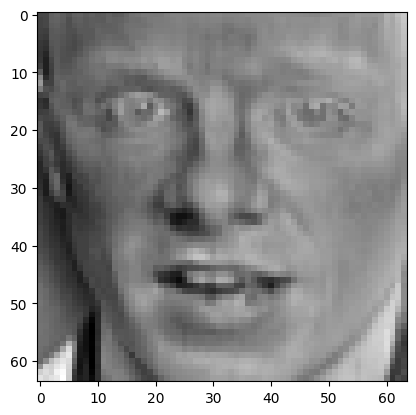

In [39]:
# Centering the Matrix

mean_vector = np.mean(X, axis=0)
X_centered = X - mean_vector



# print("Mean of first 10 pixels before centering:", np.mean(X[:, :10], axis=0))
# print("Mean of first 10 pixels after centering:", np.mean(X_centered[:, :10], axis=0))


plt.imshow(X_centered[0].reshape(64, 64), cmap='gray')

In [40]:
print(X_centered)

[[-0.20178728 -0.19869842 -0.12504119 ... -0.25943184 -0.18554747
  -0.21954551]
 [-0.21418397 -0.30613643 -0.3605784  ... -0.13133267 -0.10290284
  -0.09971081]
 [ 0.1081301   0.16907015  0.14355385 ...  0.01329544  0.02932855
   0.03252059]
 ...
 [ 0.21143585  0.2103925   0.18074393 ... -0.14372936 -0.10290284
  -0.08731411]
 [-0.11501041 -0.14084718 -0.1787602  ...  0.21164256  0.21941122
   0.22673547]
 [-0.07368809 -0.28960752 -0.21595028 ... -0.18091944 -0.01199377
  -0.1534298 ]]


In [44]:
n_samples = X_centered.shape[0]

covariance_matrix = np.dot(X_centered.T, X_centered) / (n_samples)

print("Covariance matrix shape:", covariance_matrix.shape)
print("Mean of cov matrix:", np.mean(covariance_matrix))
print("Max value:", np.max(covariance_matrix))
print("Diagonal preview:", np.diag(covariance_matrix)[:10])


Covariance matrix shape: (4096, 4096)
Mean of cov matrix: 0.004117422
Max value: 0.043570008
Diagonal preview: [0.03256898 0.03582188 0.03782978 0.03727631 0.03547852 0.03177566
 0.02785563 0.02397252 0.02173591 0.0205646 ]


In [49]:
# Eigen Decomposition - Extract the PCA
eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

sorted_idx = np.argsort(eigenvalues)[::-1]

eigenvalues = eigenvalues[sorted_idx]
eigenvectors = eigenvectors[:, sorted_idx]

print("Top 10 eigenvalues:", eigenvalues[:10])
print("Shape of eigenvectors:", eigenvectors.shape)  # should be (4096, 4096)


Top 10 eigenvalues: [18.793076  11.044083   6.288853   3.9446976  2.8489025  2.4914658
  1.915263   1.607131   1.5453494  1.3196434]
Shape of eigenvectors: (4096, 4096)


In [59]:
k = 50
V = eigenvectors[:, :k] # shape: (4096, 50)

# Projecting the centered data into the lower-dimensional space
X_reduced = np.dot(X_centered, V)

print("Reduced shape:", X_reduced.shape)



Reduced shape: (400, 50)


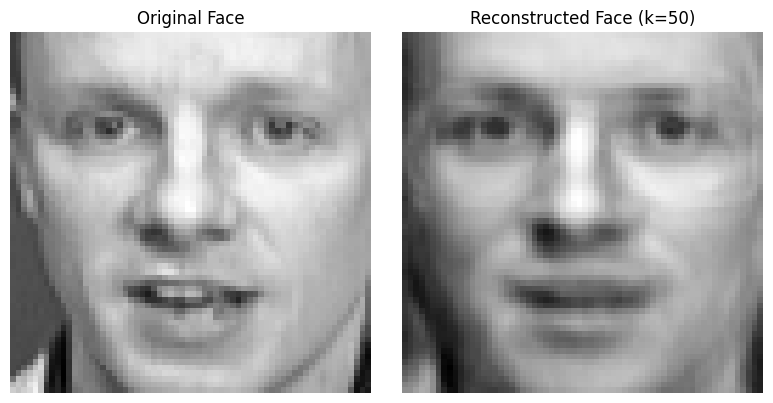

In [60]:
# Reconstruct a Face from Reduced Form
X_approx = np.dot(X_reduced, V.T) + mean_vector

index = 0  # change to view different images
original = X[index].reshape(64, 64)
reconstructed = X_approx[index].reshape(64, 64)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].imshow(original, cmap='gray')
axes[0].set_title("Original Face")
axes[0].axis('off')

axes[1].imshow(reconstructed, cmap='gray')
axes[1].set_title("Reconstructed Face (k=50)")
axes[1].axis('off')

plt.tight_layout()
plt.show()